<a href="https://colab.research.google.com/github/jalalsowat/tutorial_YOLO-NAS/blob/main/YOLO_NAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jalalsowat/tutorial_YOLO-NAS.git

Cloning into 'tutorial_YOLO-NAS'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [7]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [10]:
%%capture
!pip install super-gradients==3.2.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [11]:
from super_gradients.training import models
yolo_nas_s = models.get("yolo_nas_s",pretrained_weights='coco')

[2024-03-16 11:30:06] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-03-16 11:30:12] WARNING - __init__.py - Failed to import pytorch_quantization
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2024-03-16 11:30:18] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-03-16 11:30:18] WARNING - export.py - Failed to import pytorch_quantization
[2024-03-16 11:30:18] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-03-16 11:30:18] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2024-03-16 11:30:18] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2024-03-16 11:30:18] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2024-03-16 11:30:18] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-

In [13]:
!pip install torchinfo

In [14]:
from torchinfo import summary
summary(model=yolo_nas_s,
        input_size=(16,3,640,640),
        col_names =["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_S (YoloNAS_S)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

[2024-03-16 11:40:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


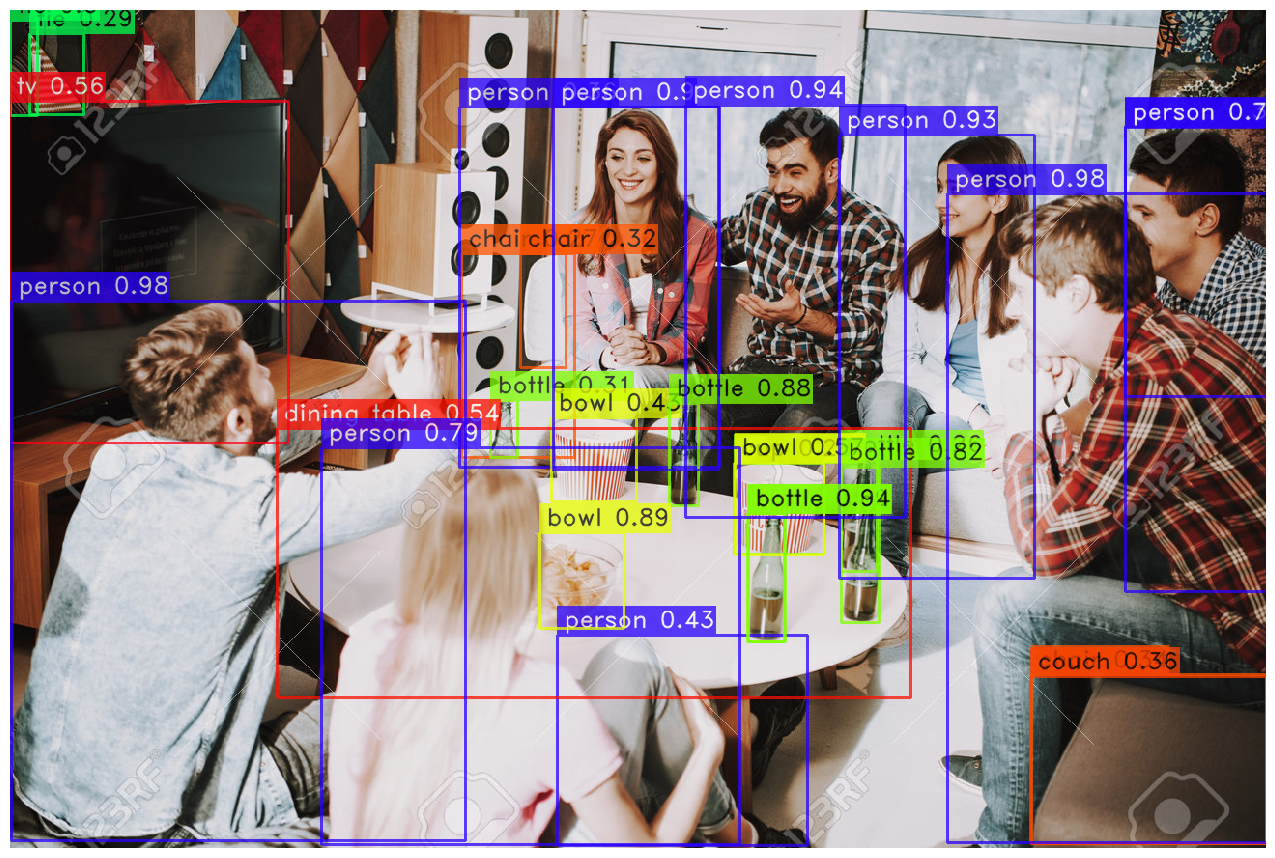

In [15]:
url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
yolo_nas_s.predict(url,conf=0.25).show()

[2024-03-16 11:49:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


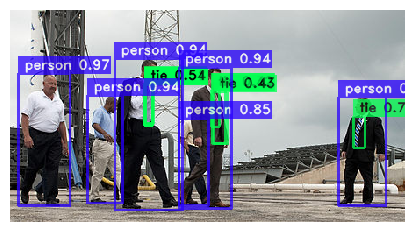

In [17]:
url = "/content/Elon_Musk_gives_tour_for_President_Barack_Obama.jpg"
yolo_nas_s.predict(url,conf=0.25).show()

In [18]:
!git add .

In [19]:
!git commit -m "work preddict image"

In [21]:
!git push origin main

In [22]:
!git remote add origin https://github.com/jalalsowat/tutorial_YOLO-NAS.git

In [24]:
!git push -u origin main